# EPA112A - Programming for Data Science - Group 31

- Georges Puttaert - 4686160
- Thijs Roolvink
- Gijs de Werd

## Research Question

 **Income Inequality and Social Welfare: What is the impact of income inequality on social welfare indicators, such as life expectancy, education access, and healthcare quality for countries in the low, lower middle, upper middle and high income categories?**

Link to countries per income category:
<br>
https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html

Chosen Countries per category:
- **Upper income**: United States of America (USA)
- **Upper middle income**: Argentina (ARG)
- **Lower middle income**: India (IND)
- **Low income**: Ethiopia (ETH)

### Packages

In [2]:
import wbdata
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


### Indicators from the World Bank

In [3]:
# Define indicators
health_indicators = {'SH.XPD.CHEX.GD.ZS': "Health Expenditure as a Percentage of GDP", "SH.IMM.IDPT": "Immunization"}
GDP_indicator = {'NY.GDP.PCAP.CD': 'gdppc'}
life_exp_indicator = {'SP.DYN.LE00.IN': 'Life Expectancy at Birth', 'SH.DYN.MORT': 'Child Mortality'}
immuni_childmortality_indicator = {"SH.IMM.IDPT": "Immunization", 'SH.STA.MMRT': 'Maternal Mortality Rate'}

### DataFrames for chosen indicators and countries from the World Bank

In [4]:
#United States of America
df_health_usa = wbdata.get_dataframe(health_indicators, country=['USA'], convert_date=True)
df_gdp_usa = wbdata.get_dataframe(GDP_indicator, country=['USA'], convert_date=True)
df_life_exp_usa = wbdata.get_dataframe(life_exp_indicator, country=['USA'], convert_date=True)
df_immuni_childmortality_usa = wbdata.get_dataframe(immuni_childmortality_indicator, country=['USA'], convert_date=True)

#Argentina
df_health_arg = wbdata.get_dataframe(health_indicators, country=['ARG'], convert_date=True)
df_gdp_arg = wbdata.get_dataframe(GDP_indicator, country=['ARG'], convert_date=True)
df_life_exp_arg = wbdata.get_dataframe(life_exp_indicator, country=['ARG'], convert_date=True)
df_immuni_childmortality_arg = wbdata.get_dataframe(immuni_childmortality_indicator, country=['ARG'], convert_date=True)

#India
df_health_ind = wbdata.get_dataframe(health_indicators, country=['IND'], convert_date=True)
df_gdp_ind = wbdata.get_dataframe(GDP_indicator, country=['IND'], convert_date=True)
df_life_exp_ind = wbdata.get_dataframe(life_exp_indicator, country=['IND'], convert_date=True)
df_immuni_childmortality_ind = wbdata.get_dataframe(immuni_childmortality_indicator, country=['IND'], convert_date=True)

#Ethiopia
df_health_eth = wbdata.get_dataframe(health_indicators, country=['ETH'], convert_date=True)
df_gdp_eth = wbdata.get_dataframe(GDP_indicator, country=['ETH'], convert_date=True)
df_life_exp_eth = wbdata.get_dataframe(life_exp_indicator, country=['ETH'], convert_date=True)
df_immuni_childmortality_eth = wbdata.get_dataframe(immuni_childmortality_indicator, country=['ETH'], convert_date=True)

In [5]:
import plotly.graph_objs as go

indicators = {
    'NY.GDP.PCAP.CD': 'GDP per Capita',
    'SI.POV.GINI': 'Income Inequality (Gini Index)',
    'SP.DYN.LE00.IN': 'Life Expectancy',
    'SI.POV.DDAY': 'Poverty headcount',
    'EG.ELC.ACCS.ZS': 'Acces to electricity (percentage of pop)',
    'SH.IMM.IDPT': 'Immunization',
    'SH.STA.MMRT': 'Maternal Mortality Rate'
}

countries = ['USA', 'ARG', 'IND','ETH'] 
# Choose which country 
countries = countries[0]

# Get the specific dates we want
df = wbdata.get_dataframe(indicators, country=countries, convert_date=True)
df = df.loc['2000-01-01':'2020-01-01']

columns_to_interpolate = ['Income Inequality (Gini Index)', 'Life Expectancy',
       'Poverty headcount', 'Acces to electricity (percentage of pop)'
       , 'Immunization', 'Maternal Mortality Rate']

# interpolate the NAN values 
for column in columns_to_interpolate:
    df[column] = df[column].interpolate()


fig = go.Figure()
fig2 = go.Figure()

for indicator_code, indicator_name in indicators.items():
    if indicator_name == 'GDP per Capita':
        continue
    fig.add_trace(go.Scatter(x=df.index, y=df[indicator_name], mode='lines', name=indicator_name))

fig2.add_trace(go.Scatter(x=df.index, y=df['GDP per Capita'], mode='lines', name='GDP per Capita'))

fig.update_layout(title="Social Welfare Indicators Over Time", xaxis_title="Year", yaxis_title="Value")
fig2.update_layout(title="GDP per Capita over Time", xaxis_title="Year", yaxis_title="Euros (x1000)")

fig.show()
fig2.show()

### first random forest model

Mean Absolute Error: 4542.974453728505
Mean Squared Error: 48209919.53646867
R-squared (R2) Score: 0.536762648970819


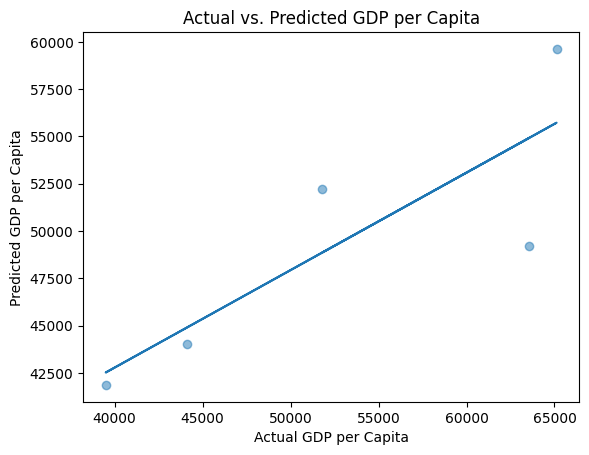

In [6]:
X = df[['Income Inequality (Gini Index)', 'Life Expectancy',
       'Poverty headcount', 'Acces to electricity (percentage of pop)',
       'Immunization', 'Maternal Mortality Rate']]
y = df['GDP per Capita']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")



plt.scatter(y_test, y_pred, alpha=0.5)

regression_line = np.polyfit(y_test, y_pred, 1)
y_fit = np.polyval(regression_line, y_test)
plt.plot(y_test, y_fit)

plt.xlabel('Actual GDP per Capita')
plt.ylabel('Predicted GDP per Capita')
plt.title('Actual vs. Predicted GDP per Capita')
plt.show()


Predicted GDP for Last 5 Years:
[57402.01787637 59967.08985082 61346.66470649 59623.65305731
 49211.37513525]

Actual GDP for Last 5 Years:
date
2016-01-01    57866.744934
2017-01-01    59907.754261
2018-01-01    62823.309438
2019-01-01    65120.394663
2020-01-01    63528.634303
Name: GDP per Capita, dtype: float64


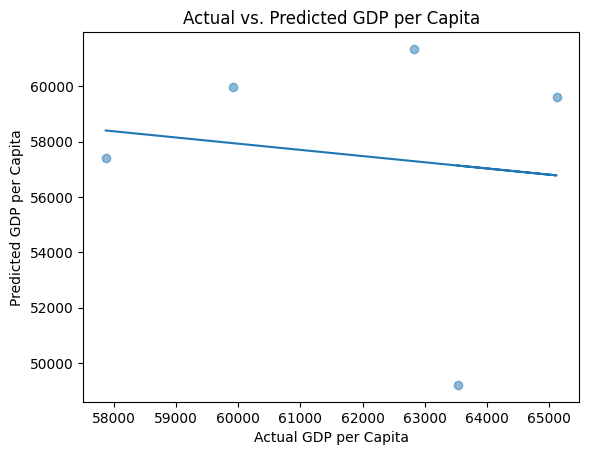

In [13]:
# Assuming your data has a date column named 'date', ensure it's sorted chronologically
df.sort_values(by='date', ascending=True, inplace=True)

# Select the last 5 years of data (if available)
last_5_years_data = df.tail(5)
# Extract features for prediction (similar to X)
X_last_5_years = last_5_years_data[['Income Inequality (Gini Index)', 'Life Expectancy',
       'Poverty headcount', 'Acces to electricity (percentage of pop)',
       'Immunization', 'Maternal Mortality Rate']]

# Predict GDP for the last 5 years
predicted_gdp_last_5_years = rf_model.predict(X_last_5_years)

# Compare with the actual GDP values for the last 5 years
actual_gdp_last_5_years = last_5_years_data['GDP per Capita']

# Print the predicted and actual GDP values
print("Predicted GDP for Last 5 Years:")
print(predicted_gdp_last_5_years)
print("\nActual GDP for Last 5 Years:")
print(actual_gdp_last_5_years)

plt.scatter(actual_gdp_last_5_years, predicted_gdp_last_5_years, alpha=0.5)

regression_line = np.polyfit(actual_gdp_last_5_years, predicted_gdp_last_5_years, 1)
y_fit = np.polyval(regression_line, actual_gdp_last_5_years)
plt.plot(actual_gdp_last_5_years, y_fit)

plt.xlabel('Actual GDP per Capita')
plt.ylabel('Predicted GDP per Capita')
plt.title('Actual vs. Predicted GDP per Capita')
plt.show()


### Plots of all indicators

In [ ]:
countries = ['USA', 'ARG', 'IND', 'ETH']

df_health = wbdata.get_dataframe(health_indicators, country=countries, convert_date=True)
df_gdp = wbdata.get_dataframe(GDP_indicator, country=countries, convert_date=True)
df_life_exp = wbdata.get_dataframe(life_exp_indicator, country=countries, convert_date=True)
df_immuni_childmortality = wbdata.get_dataframe(immuni_childmortality_indicator, country=countries, convert_date=True)

#Reset index of the dataframes
df_health = df_health.reset_index()
df_gdp = df_gdp.reset_index()
df_life_exp = df_life_exp.reset_index()
df_immuni_childmortality = df_immuni_childmortality.reset_index()

#Dataframes with dates starting in 2000 unitll 2020
df_health_filtered = df_health[(df_health['date'] >= str(2000)) & (df_health['date'] <= str(2020))]
df_gdp_filtered = df_gdp[(df_gdp['date'] >= str(2000)) & (df_gdp['date'] <= str(2020))]
df_life_exp_filtered = df_life_exp[(df_life_exp['date'] >= str(2000)) & (df_life_exp['date'] <= str(2020))]
df_immuni_childmortality_filtered = df_immuni_childmortality[(df_immuni_childmortality['date'] >= str(2000)) & (df_immuni_childmortality['date'] <= str(2020))]

In [ ]:
#GDP per capita
fig1 = px.line(df_gdp, x = 'date', y = 'gdppc', color = 'country', title = 'GDP per Capita')

#Health expenditure as a percentae of GDP
fig2 = px.line(df_health, x = 'date', y = 'Health Expenditure as a Percentage of GDP', color = 'country', title = 'Health Expenditure as a Percentage of GDP')

#Immunization
fig3 = px.line(df_health, x = 'date', y = 'Immunization', color = 'country', title = 'Immunization')

#Life Expectancy at Birth
fig4 = px.line(df_life_exp, x = 'date', y = 'Life Expectancy at Birth', color = 'country', title = 'Life Expectancy at Birth')

#Child Mortality
fig5 = px.line(df_life_exp, x = 'date', y = 'Child Mortality', color = 'country', title = 'Child Mortality')

# Maternal Mortality Rate
fig6 = px.line(df_immuni_childmortality, x = 'date', y = 'Maternal Mortality Rate', color = 'country', title = 'Maternal Mortality Rate')

fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()

### Plots of all indicators starting in 2000 unitl 2020

In [ ]:
#GDP per capita
fig1 = px.line(df_gdp_filtered, x = 'date', y = 'gdppc', color = 'country', title = 'GDP per Capita')

#Health expenditure as a percentae of GDP
fig2 = px.line(df_health_filtered, x = 'date', y = 'Health Expenditure as a Percentage of GDP', color = 'country', title = 'Health Expenditure as a Percentage of GDP')

#Immunization
fig3 = px.line(df_health_filtered, x = 'date', y = 'Immunization', color = 'country', title = 'Immunization')

#Life Expectancy at Birth
fig4 = px.line(df_life_exp_filtered, x = 'date', y = 'Life Expectancy at Birth', color = 'country', title = 'Life Expectancy at Birth')

#Child Mortality
fig5 = px.line(df_life_exp_filtered, x = 'date', y = 'Child Mortality', color = 'country', title = 'Child Mortality')

# Maternal Mortality Rate
fig6 = px.line(df_immuni_childmortality_filtered, x = 'date', y = 'Maternal Mortality Rate', color = 'country', title = 'Maternal Mortality Rate')

fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()

In [ ]:
'hello'

'hello'

In [ ]:
print('this is a test')

this is a test


In [ ]:
print('tet')

tet
